<a href="https://colab.research.google.com/github/HyeongseokKim/My_codes/blob/main/01_03_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%A7%81%EC%A0%91%EA%B5%AC%ED%98%84%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [19]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


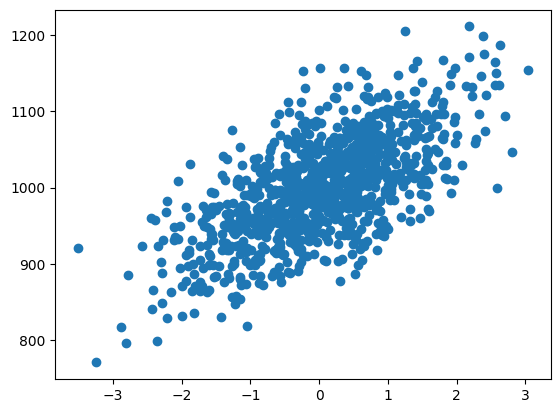

In [20]:
plt.scatter(x_train, y_train)
plt.show()

## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS

In [27]:
hypothesis = x_train * w1 + w0

cost = 1/n_data*np.sum((hypothesis-y_train)**2)
cost

1000925887.6519477

## Weight 초기화

In [55]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.42046446] [0.4282928]


## y_pred 계산

In [33]:
y_pred=hypothesis.reshape(-1)

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [34]:
cost = np.sum((y_train - y_pred) ** 2) / n_data
cost

1000879.2626024415

## Weight 업데이트

 - w1 = (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [39]:
w1 = (-1) * np.sum((y_train - y_pred) * x_train) * 2 / n_data
w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data
hypothesis = x_train * w1 + w0
y_pred=hypothesis.reshape(-1)

In [40]:
cost = np.sum((y_train - y_pred) ** 2) / n_data
cost

594394464.8041077

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output
    - clear_output()

In [47]:
epochs = 1000
learning_rate = 0.01

In [58]:
from numpy.lib.function_base import gradient
cost_list=[]
for epoch in range(epochs):
  hypothesis = x_train * w1 + w0
  y_pred=hypothesis.reshape(-1)
  cost = np.mean((y_train - y_pred) ** 2)

  gradient_w1=np.mean((y_pred-y_train)*x_train*2)
  w1 -= learning_rate*gradient_w1

  gradient_w0 = np.mean((y_pred-y_train)*2)
  w0 -= learning_rate*gradient_w0

  cost_list.append(cost)

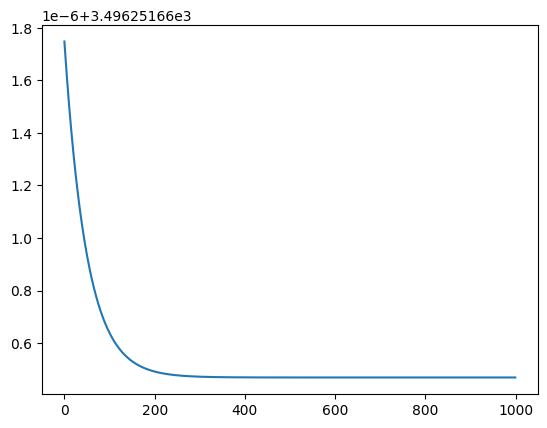

In [59]:
plt.plot(cost_list)
plt.show()

In [60]:
w1, w0

(array([12.22445307]), array([998.55342408]))

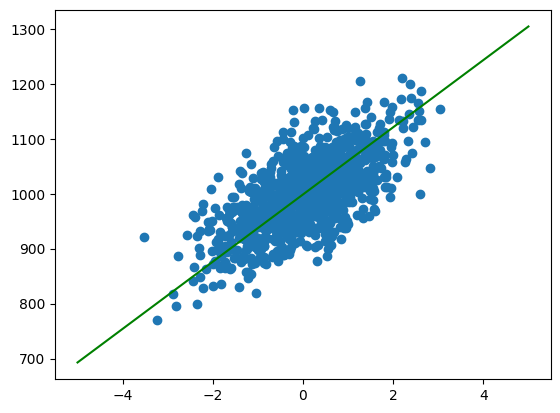

In [69]:
plt.plot([-5, 5], [-25*w1+w0, 25*w1+w0], color='g')
plt.scatter(x_train, y_train)
plt.show()

In [ ]:
|